                Age           BMI      Children       Charges         Claim
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean      41.054000     27.476230      1.999900   8987.112044      0.287300
std       13.484104      7.195298      1.410496   1642.948584      0.452525
min       18.000000     15.000232      0.000000   4829.920313      0.000000
25%       30.000000     21.231439      1.000000   7780.673501      0.000000
50%       41.000000     27.475637      2.000000   8976.552174      0.000000
75%       53.000000     33.622875      3.000000  10202.572341      1.000000
max       64.000000     39.997317      4.000000  13270.799645      1.000000
   Age  Gender        BMI Smoking     Region  Children       Charges  Claim
0   56    Male  26.545163      No  Northeast         0  11286.852899      1
1   46    Male  39.977269      No  Southwest         0  10070.475471      1
2   32  Female  35.977287      No  Southwest         4   7800.335975      0
3   60  Fema

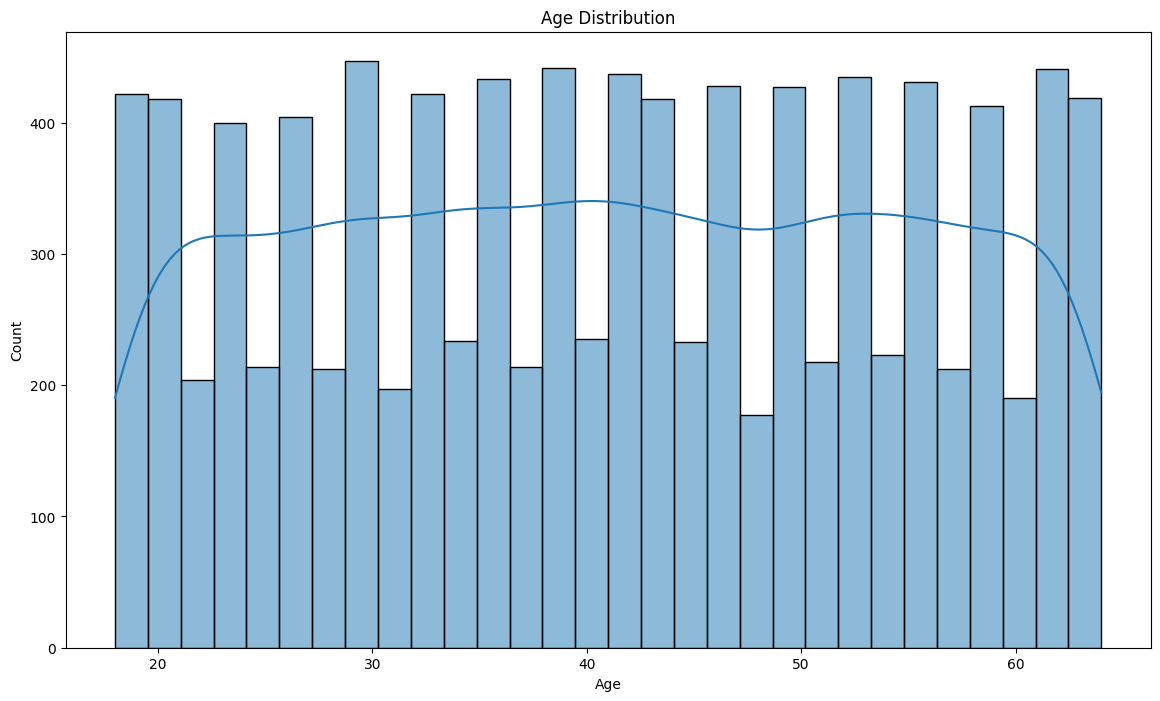

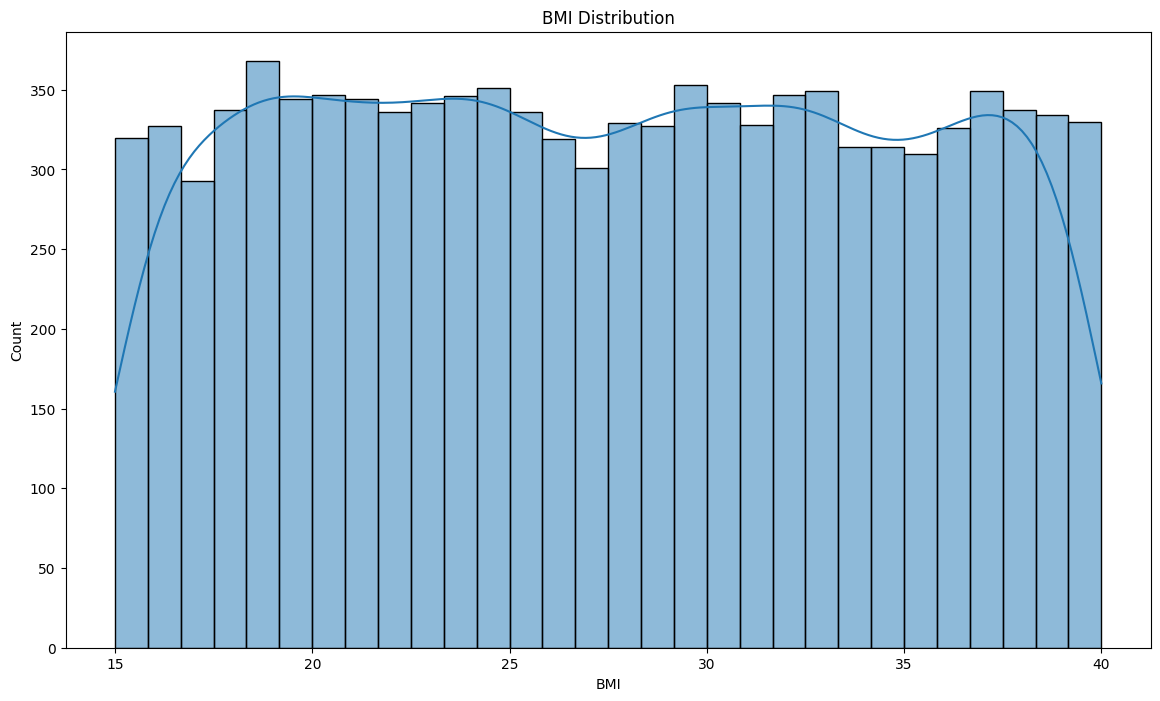

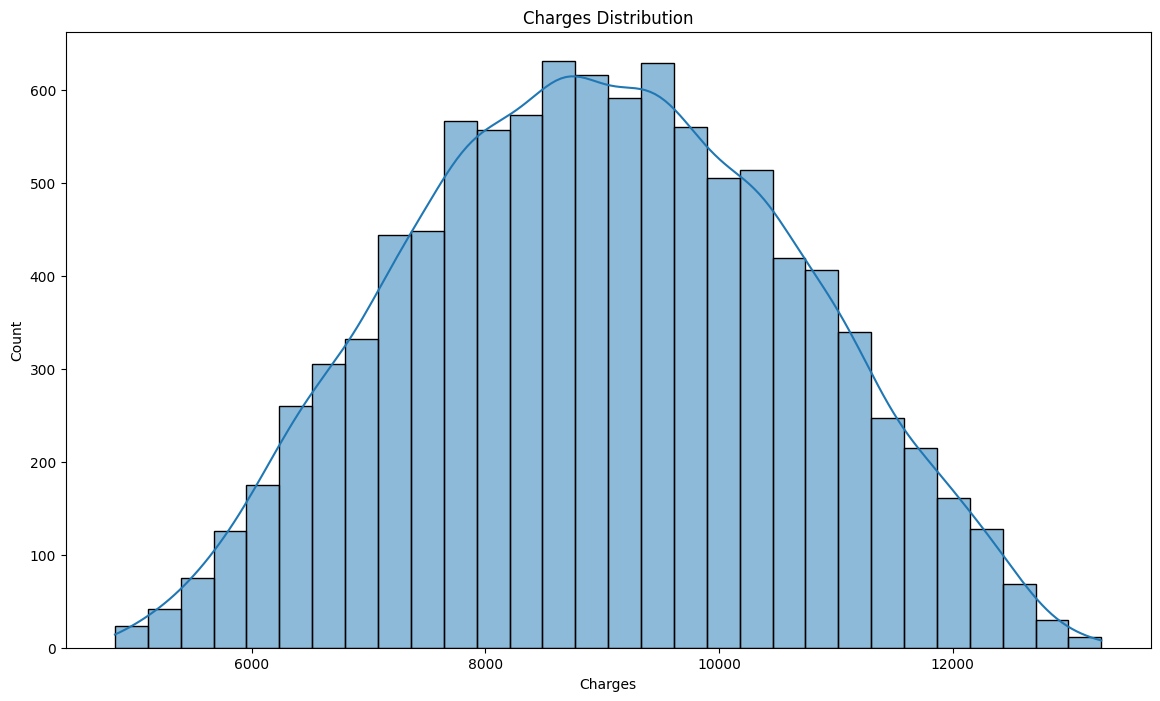

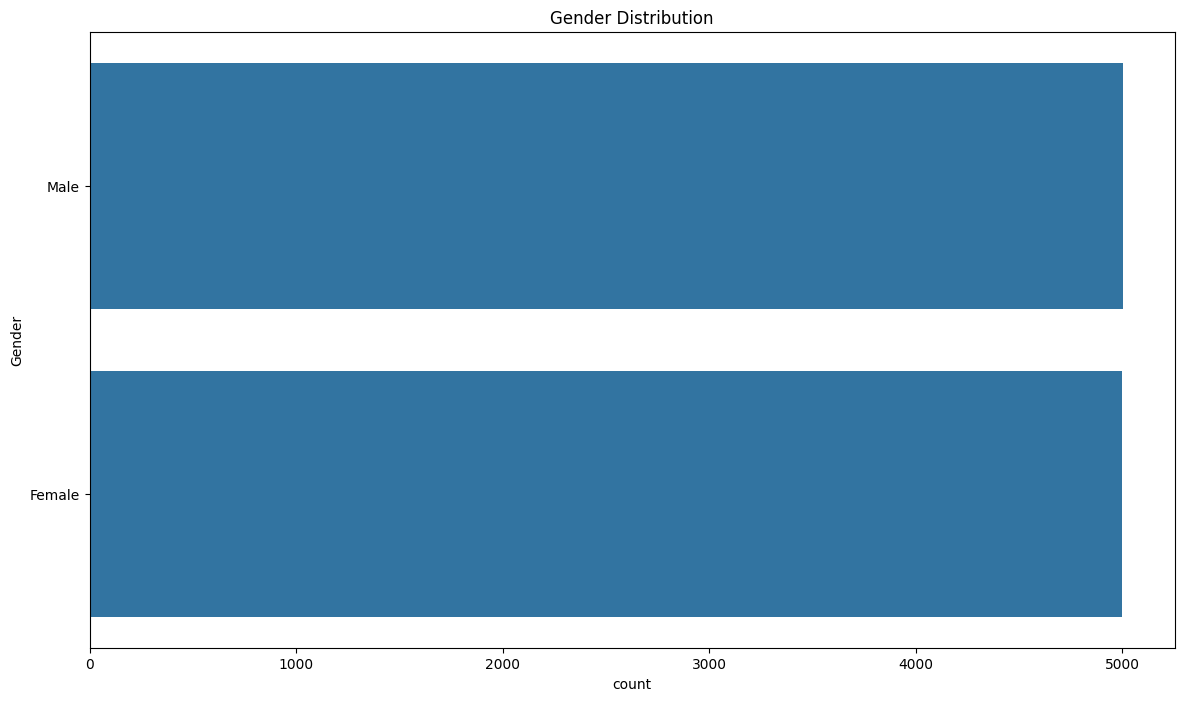

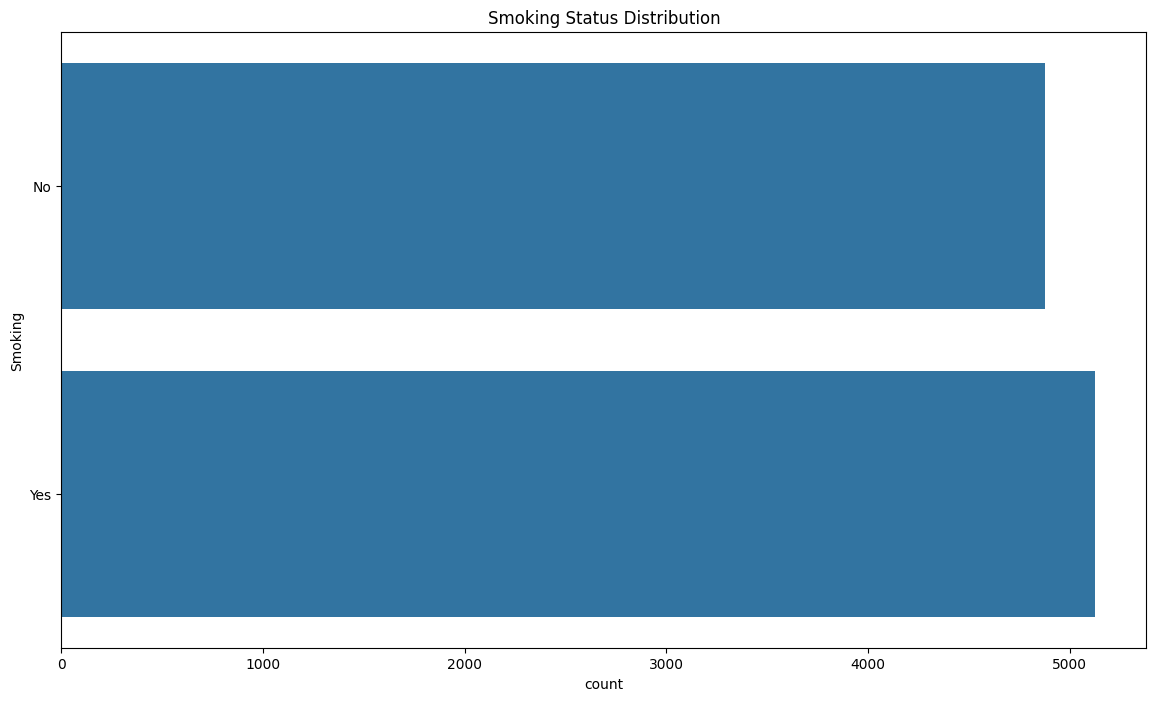

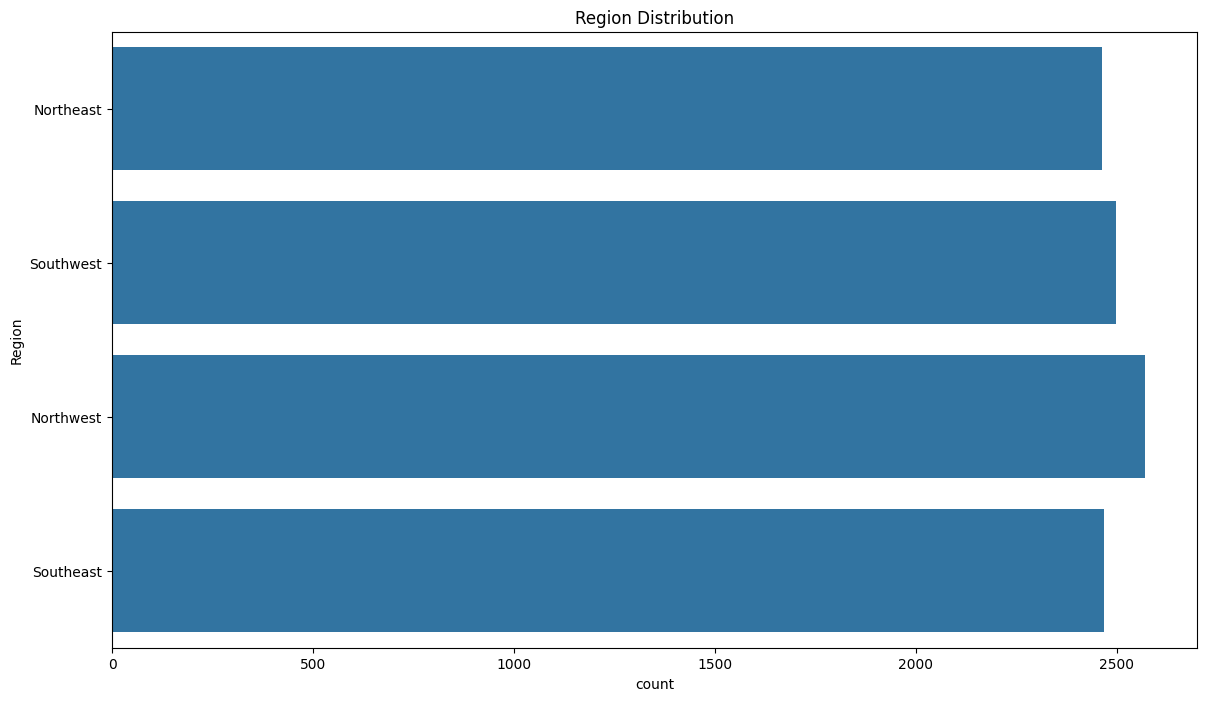

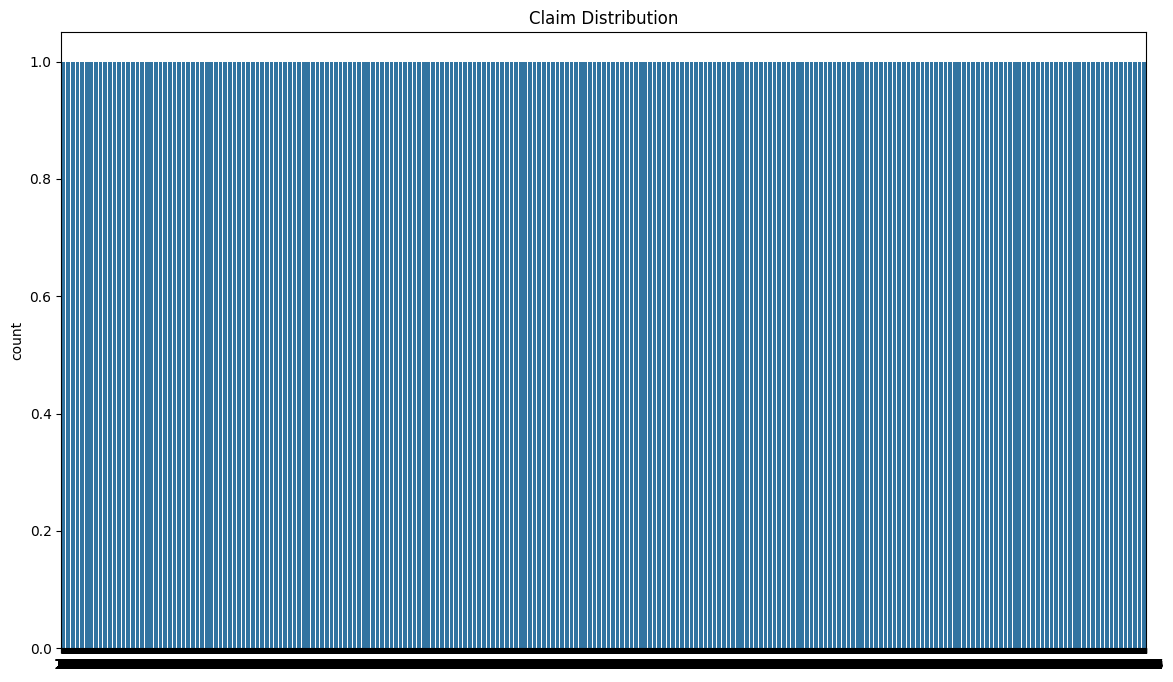

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('synthetic_insurance_claim_data.csv')

# Display basic statistics
print(data.describe())

# Display the first few rows of the dataset
print(data.head())

# Plot the distribution of numerical features
plt.figure(figsize=(14, 8))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data['BMI'], kde=True, bins=30)
plt.title('BMI Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data['Charges'], kde=True, bins=30)
plt.title('Charges Distribution')
plt.show()

# Plot the count of categorical features
plt.figure(figsize=(14, 8))
sns.countplot(data['Gender'])
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data['Smoking'])
plt.title('Smoking Status Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data['Region'])
plt.title('Region Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data['Claim'])
plt.title('Claim Distribution')
plt.show()




In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical variables
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data['Smoking'] = LabelEncoder().fit_transform(data['Smoking'])
data['Region'] = LabelEncoder().fit_transform(data['Region'])

# Define features and target
features = ['Age', 'Gender', 'BMI', 'Smoking', 'Region', 'Children', 'Charges']
target = 'Claim'

X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the MLP model
mlp_model = Sequential()
mlp_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(Dense(1, activation='sigmoid'))

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
mlp_history = mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test)
print(f'MLP Model Accuracy: {mlp_accuracy:.4f}')


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.1988 - accuracy: 0.9345 - val_loss: 0.0739 - val_accuracy: 0.9815
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.0564 - accuracy: 0.9837 - val_loss: 0.0406 - val_accuracy: 0.9900
Epoch 3/10
250/250 [==============================] - 1s 5ms/step - loss: 0.0368 - accuracy: 0.9879 - val_loss: 0.0328 - val_accuracy: 0.9895
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 0.0277 - accuracy: 0.9916 - val_loss: 0.0245 - val_accuracy: 0.9915
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9929 - val_loss: 0.0199 - val_accuracy: 0.9930
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0197 - accuracy: 0.9944 - val_loss: 0.0167 - val_accuracy: 0.9975
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0174 - accuracy: 0.9944 - val_loss: 0.0142 - val_accuracy: 0.9970
Epoch 

In [6]:
from tensorflow.keras.layers import Conv1D, Flatten

# Reshape data for CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate the model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print(f'CNN Model Accuracy: {cnn_accuracy:.4f}')


Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.1982 - accuracy: 0.9174 - val_loss: 0.0891 - val_accuracy: 0.9650
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.0564 - accuracy: 0.9791 - val_loss: 0.0369 - val_accuracy: 0.9925
Epoch 3/10
250/250 [==============================] - 2s 7ms/step - loss: 0.0354 - accuracy: 0.9881 - val_loss: 0.0330 - val_accuracy: 0.9880
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 0.0264 - accuracy: 0.9920 - val_loss: 0.0222 - val_accuracy: 0.9925
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.0227 - accuracy: 0.9916 - val_loss: 0.0183 - val_accuracy: 0.9935
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.0187 - accuracy: 0.9946 - val_loss: 0.0145 - val_accuracy: 0.9955
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.0183 - accuracy: 0.9927 - val_loss: 0.0143 - val_accuracy: 0.9975
Epoch 

In [7]:
from tensorflow.keras.layers import LSTM

# Reshape data for RNN
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the RNN model
rnn_model = Sequential()
rnn_model.add(LSTM(32, activation='relu', input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

# Evaluate the model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_rnn, y_test)
print(f'RNN Model Accuracy: {rnn_accuracy:.4f}')


Epoch 1/10
250/250 [==============================] - 3s 5ms/step - loss: 0.2683 - accuracy: 0.8816 - val_loss: 0.0809 - val_accuracy: 0.9740
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.0717 - accuracy: 0.9747 - val_loss: 0.1282 - val_accuracy: 0.9290
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.0514 - accuracy: 0.9816 - val_loss: 0.0615 - val_accuracy: 0.9735
Epoch 4/10
250/250 [==============================] - 2s 6ms/step - loss: 0.0434 - accuracy: 0.9847 - val_loss: 0.0306 - val_accuracy: 0.9960
Epoch 5/10
250/250 [==============================] - 1s 6ms/step - loss: 0.0459 - accuracy: 0.9824 - val_loss: 0.0541 - val_accuracy: 0.9755
Epoch 6/10
250/250 [==============================] - 1s 5ms/step - loss: 0.0351 - accuracy: 0.9874 - val_loss: 0.0251 - val_accuracy: 0.9945
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.0306 - accuracy: 0.9880 - val_loss: 0.1005 - val_accuracy: 0.9540
Epoch 